In [1]:
# This generator is intended to generate
# sequences with specified data distributions.

In [2]:
# Support sequence generations:

# Token:
# STRING
# INT

# Token frequency distributions:
# RANDOM
# ZIPF
# NORM
# BINOM

# Pattern level:
# N_GRAM

# Tasks:
# SUM (INT)
# MEDIAN (INT)
# MID_TOKEN (STRING, INT)

In [3]:
import numpy as np
import random
from scipy import special, stats
from constants import *
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [4]:
class DistSeq:
    def __init__(self, max_token=50265, 
                 max_seq_len=32, avg_seq_len=16, min_seq_len=8,
                 seq_len_dist="random",
                 vocab=None):
        self.max_token = max_token
        self.max_seq_len = max_seq_len
        self.avg_seq_len = avg_seq_len
        self.min_seq_len = min_seq_len
        self.seq_len_dist = seq_len_dist
    
        if vocab == None:
            self.vocab = np.arange(1., self.max_token+1.)
        else:
            # if a vocab is provided, we sampled from the vocab
            
            self.vocab = vocab
        self.vocab_idx = np.arange(1., self.max_token+1.)

        # zipf       
        zipf_a = 1.01
        self.zipf_prob = self.vocab_idx**(-zipf_a) / special.zetac(zipf_a)
        np.random.shuffle(self.zipf_prob)
        
        # uniform
        self.uniform_prob = [(1. / len(self.vocab_idx)) for _ in range(len(self.vocab_idx))]
        np.random.shuffle(self.uniform_prob)
        
        # normal
        norm_x = np.linspace(-3.0, 3.0, num=len(self.vocab_idx)) # make this fake x
        self.normal_prob = stats.norm(0, 1).pdf(norm_x) # assume mean=0;var=1
        np.random.shuffle(self.normal_prob)

    def uniform(self, k=100):
        dist_seqs = []
        for _ in range(k):
            seq_len = random.randint(self.min_seq_len, self.max_seq_len)
            dist_seq = random.choices(self.vocab, self.uniform_prob, k=seq_len)
            dist_seqs.append(dist_seq)
        return dist_seqs
    
    def zipf(self, k=100):
        dist_seqs = []
        for _ in range(k):
            seq_len = random.randint(self.min_seq_len, self.max_seq_len)
            dist_seq = random.choices(self.vocab, self.zipf_prob, k=seq_len)
            dist_seqs.append(dist_seq)
        return dist_seqs

    def norm(self, k=100):
        dist_seqs = []
        for _ in range(k):
            seq_len = random.randint(self.min_seq_len, self.max_seq_len)
            dist_seq = random.choices(self.vocab, self.normal_prob, k=seq_len)
            dist_seqs.append(dist_seq)
        return dist_seqs
    
    def visualize_vocab_dist(self, dist_seqs):
        flatten_dist_seqs = [j for sub in dist_seqs for j in sub]
        counter_dist_seqs = Counter(flatten_dist_seqs)
        
        labels, values = zip(*counter_dist_seqs.items())
        indSort = np.argsort(values)[::-1]
        labels = np.array(labels)[indSort]
        values = np.array(values)[indSort]
        indexes = np.arange(len(labels))

        bar_width = 0.35
        plt.rcParams['axes.facecolor'] = 'white'
        plt.rcParams['axes.edgecolor'] = "black"
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111)
        plt.rcParams["font.family"] = "Times New Roman"
        plt.tight_layout()
        plt.grid(color='black', linestyle='-.')
        plt.bar(indexes, values, color="r", alpha=0.5)
        plt.title('Sorted Frequency Histogram')
        plt.show()

In [5]:
dsg = DistSeq(max_token=50)

In [6]:
sampled_seqs = dsg.norm(k=1000)

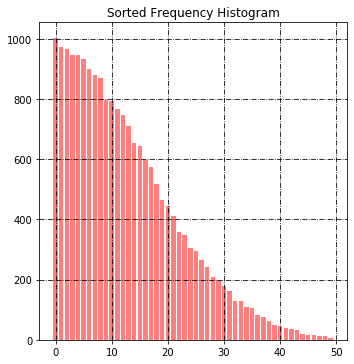

In [7]:
dsg.visualize_vocab_dist(sampled_seqs)

In [8]:
from __future__ import absolute_import, division, print_function

import collections
import unicodedata

import six

def convert_to_unicode(text):
    """Converts `text` to Unicode (if it's not already), assuming utf-8 input."""
    if six.PY3:
        if isinstance(text, str):
            return text
        elif isinstance(text, bytes):
            return text.decode("utf-8", "ignore")
        else:
            raise ValueError("Unsupported string type: %s" % (type(text)))
    elif six.PY2:
        if isinstance(text, str):
            return text.decode("utf-8", "ignore")
        elif isinstance(text, unicode):
            return text
        else:
            raise ValueError("Unsupported string type: %s" % (type(text)))
    else:
        raise ValueError("Not running on Python2 or Python 3?")

def load_bert_vocab(vocab_file):
    """Loads a vocabulary file into a dictionary."""
    vocab = collections.OrderedDict()
    index = 0 # 0 is reserved for padding
    with open(vocab_file, "r") as reader:
        while True:
            token = convert_to_unicode(reader.readline())
            if not token:
                break
            token = token.strip()
            vocab[token] = index
            index += 1
    return vocab

In [9]:
load_bert_vocab(bert_vocab_path)

OrderedDict([('[PAD]', 0),
             ('[unused0]', 1),
             ('[unused1]', 2),
             ('[unused2]', 3),
             ('[unused3]', 4),
             ('[unused4]', 5),
             ('[unused5]', 6),
             ('[unused6]', 7),
             ('[unused7]', 8),
             ('[unused8]', 9),
             ('[unused9]', 10),
             ('[unused10]', 11),
             ('[unused11]', 12),
             ('[unused12]', 13),
             ('[unused13]', 14),
             ('[unused14]', 15),
             ('[unused15]', 16),
             ('[unused16]', 17),
             ('[unused17]', 18),
             ('[unused18]', 19),
             ('[unused19]', 20),
             ('[unused20]', 21),
             ('[unused21]', 22),
             ('[unused22]', 23),
             ('[unused23]', 24),
             ('[unused24]', 25),
             ('[unused25]', 26),
             ('[unused26]', 27),
             ('[unused27]', 28),
             ('[unused28]', 29),
             ('[unused29]', 30),
  